In [12]:
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
from astropy.coordinates import SkyCoord
import easyaccess as ea
import pandas as pd
from glob import glob

In [2]:
## name ra dec
#DG19ukvo 89.21146 -33.44248
#DG19llhk 90.86311 -32.38554

#47  89.211524 -33.309060     700  19459113
#48  89.212222 -33.333374     700  19459111

# rag, decg = 89.21146, -33.44248 ## ukvo
# #rag, decg = 90.86311, -32.38554 ## llhk

# #rades, decdes = 89.211524, -33.309060
# rades, decdes = 89.212222, -33.333374 ## for ukvo - 0.109

# growth = SkyCoord(rag, decg, unit='degree')
# cand = SkyCoord(rades, decdes, unit='degree')
# sep = cand.separation(growth)
# print sep.deg

growth = {} #[ra, dec]
growth['DG19bexl'] = [90.45378, -28.66039]
growth['DG19nouo'] = [92.0013, -31.66915]
growth['DG19ootl'] = [87.03556, -36.07611]
growth['DG19ukvo'] = [89.21146, -33.44248]
growth['DG19llhk'] = [90.86311, -32.38554]
growth['DG19oahn'] = [86.33527, -26.84768]
growth['DS19qcso'] = [88.208631, -30.381382]

print growth

{'DG19ootl': [87.03556, -36.07611], 'DS19qcso': [88.208631, -30.381382], 'DG19nouo': [92.0013, -31.66915], 'DG19bexl': [90.45378, -28.66039], 'DG19ukvo': [89.21146, -33.44248], 'DG19llhk': [90.86311, -32.38554], 'DG19oahn': [86.33527, -26.84768]}


In [3]:
con = ea.connect('destest')

Connecting to DB ** destest ** ...


In [4]:
## look at snobs for all missing cands
dl = 0.1
best = {}
bad = []
for key, val in growth.iteritems():
    r, d = val[0], val[1]
    rahigh, ralow = r+dl, r-dl
    dechigh, declow = d+dl, d-dl
    query = ("SELECT RA, DEC, SEASON, EXPNUM, CCDNUM, SNOBJID FROM SNOBS" 
             " WHERE  RA < "+str(rahigh)+" and RA > "+str(ralow)+" and DEC < "+str(dechigh)+" and DEC > "+str(declow)+" "
             "and SEASON = 700")
    df = con.query_to_pandas(query)
    
    if df.empty:
        bad.append(key)
        continue
        
    for index, row in df.iterrows():
        ra, dec = df['RA'], df['DEC']
        match = SkyCoord(ra, dec, unit='degree')
        cand = SkyCoord(val[0], val[1], unit='degree')
        sep = cand.separation(match)
        df['SEP']= sep

    print key, val[0], val[1]
    print df.sort_values('SEP')
    print
    minobjid = df['SEP'].min()
#    print minobjid
    mindf = df.loc[df['SEP'] == minobjid]
#    print mindf
    best[key] = [mindf['RA'].values[0], mindf['DEC'].values[0], mindf['SNOBJID'].values[0], mindf['SEP'].values[0]]
    
print bad

DG19ootl 87.03556 -36.07611
           RA        DEC  SEASON  EXPNUM  CCDNUM   SNOBJID       SEP
6   87.040693 -36.076949     700  856751      47  19432925  0.004233
5   87.062173 -36.083356     700  856751      47  19432923  0.022696
4   87.074248 -36.038109     700  856751      47  19432920  0.049217
8   87.010685 -36.146260     700  856779      53  19441418  0.072972
10  87.010685 -36.146260     700  856779      53  19452678  0.072972
2   86.957827 -36.121390     700  856751      47  19432911  0.077429
1   86.943643 -36.125539     700  856751      47  19432908  0.089212
3   86.970112 -36.000011     700  856751      47  19432914  0.092693
7   86.948159 -36.166667     700  856779      53  19441412  0.114825
9   86.948159 -36.166667     700  856779      53  19452674  0.114825
11  86.948163 -36.166671     700  856807      53  19514335  0.114827
0   86.948150 -36.166668     700  856751      53  19428133  0.114831

DS19qcso 88.208631 -30.381382
           RA        DEC  SEASON  EXPNUM  CC

DG19bexl 90.45378 -28.66039
           RA        DEC  SEASON  EXPNUM  CCDNUM   SNOBJID       SEP
24  90.453777 -28.660427     700  856809      14  19507821  0.000037
12  90.453720 -28.660365     700  856783      59  19507358  0.000058
13  90.457114 -28.660764     700  856783      59  19507359  0.002950
25  90.457356 -28.661022     700  856809      14  19507822  0.003201
23  90.449386 -28.666645     700  856809      14  19507819  0.007348
33  90.449410 -28.666678     700  856811      59  19517867  0.007365
11  90.449378 -28.666673     700  856783      59  19507357  0.007376
15  90.464863 -28.653878     700  856783      59  19507361  0.011704
34  90.447956 -28.699599     700  856811      59  19517868  0.039541
16  90.470425 -28.697301     700  856783      59  19507362  0.039695
10  90.443167 -28.700618     700  856783      59  19507356  0.041291
26  90.460362 -28.707141     700  856809      14  19507823  0.047106
32  90.399426 -28.684697     700  856811      59  19517866  0.053526
22  90

In [5]:
best

{'DG19bexl': [90.453777, -28.6604273, 19507821, 3.739277611100462e-05],
 'DG19llhk': [90.8630786, -32.3855462, 19522550, 2.723133764541785e-05],
 'DG19nouo': [92.0012824, -31.6691436, 19504037, 1.628919993718555e-05],
 'DG19oahn': [86.4273168, -26.8280532, 19489600, 0.0844447319072519],
 'DG19ootl': [87.0406933, -36.0769495, 19432925, 0.004232974595840694],
 'DG19ukvo': [89.2011905, -33.3603605, 19501186, 0.08256581761513537],
 'DS19qcso': [88.2085893, -30.3814074, 19486431, 4.403708613366399e-05]}

## try with a larger range

In [6]:
## look at sncand for all missing cands
dl = 0.15
nomatch = []
for key, val in best.iteritems():
    r, d = val[0], val[1]
    rahigh, ralow = r+dl, r-dl
    dechigh, declow = d+dl, d-dl
    query = ("SELECT RA, DEC, SEASON, SNID FROM SNCAND" 
             " WHERE  RA < "+str(rahigh)+" and RA > "+str(ralow)+" and DEC < "+str(dechigh)+" and DEC > "+str(declow)+" "
             "and SEASON = 700")
    df = con.query_to_pandas(query)
    #print df
    if df.empty:
        nomatch.append(key)
        continue
    for index, row in df.iterrows():
        ra, dec = df['RA'], df['DEC']
        match = SkyCoord(ra, dec, unit='degree')
        cand = SkyCoord(val[0], val[1], unit='degree')
        sep = cand.separation(match)
        df['SEP']= sep

    print key, val[0], val[1]
    print df.sort_values('SEP')
    print
    
print nomatch

DG19ootl 87.0406933 -36.0769495
          RA        DEC  SEASON    SNID       SEP
0  87.146843 -35.994357     700  480400  0.119120
1  87.154610 -36.167024     700  480253  0.128766

DG19nouo 92.0012824 -31.6691436
          RA        DEC  SEASON    SNID       SEP
1  92.001300 -31.669157     700  479981  0.000020
4  91.999757 -31.568678     700  479969  0.100474
3  92.111066 -31.731899     700  479983  0.112529
6  91.985482 -31.552244     700  479443  0.117672
5  91.883754 -31.733897     700  479484  0.119128
2  92.014319 -31.799302     700  479982  0.130630
0  91.944292 -31.800834     700  479980  0.140327

DG19bexl 90.453777 -28.6604273
          RA        DEC  SEASON    SNID       SEP
4  90.453749 -28.660396     700  480089  0.000040
3  90.388186 -28.698905     700  480088  0.069223
2  90.389733 -28.700867     700  480361  0.069226
0  90.423192 -28.769777     700  479652  0.112592
5  90.462733 -28.775535     700  480091  0.115376
1  90.370210 -28.771100     700  480305  0.132739

DG

# CHECK ALL GROWTH CANDS

In [7]:
growth = {}
growth['DG19lcnl'] = [87.1469, -35.99441]
growth['DG19ukvo'] = [89.21146, -33.44248]
growth['DG19nanl'] = [87.31139, -35.95584]
growth['DG19zaxn'] = [92.30795, -35.14981]
growth['DG19etsk'] = [89.10091, -30.47397]
growth['DG19yhhm'] = [91.93699, -30.82476]
growth['DG19llhk'] = [90.86311, -32.38554]
growth['DG19fqqk'] = [92.85149, -36.51731]
growth['DG19bexl'] = [90.45378, -28.66039]
growth['DG19ootl'] = [87.03556, -36.07611]
growth['DG19nouo'] = [92.0013, -31.66915]
growth['DG19oahn'] = [86.33527, -26.84768]
growth['DS19qcso'] = [88.208631, -30.381382]

In [8]:
dl = 0.1
best = {}
bad = []
for key, val in growth.iteritems():
    r, d = val[0], val[1]
    rahigh, ralow = r+dl, r-dl
    dechigh, declow = d+dl, d-dl
    query = ("SELECT RA, DEC, SEASON, EXPNUM, CCDNUM, SNOBJID FROM SNOBS" 
             " WHERE  RA < "+str(rahigh)+" and RA > "+str(ralow)+" and DEC < "+str(dechigh)+" and DEC > "+str(declow)+" "
             "and SEASON = 700")
    df = con.query_to_pandas(query)
    if df.empty:
        bad.append(key)
        continue
    
    for index, row in df.iterrows():
        ra, dec = df['RA'], df['DEC']
        match = SkyCoord(ra, dec, unit='degree')
        cand = SkyCoord(val[0], val[1], unit='degree')
        sep = cand.separation(match)
        df['SEP']= sep

    print key, val[0], val[1]
    print df.sort_values('SEP')
    print
    minobjid = df['SEP'].min()
#    print minobjid
    mindf = df.loc[df['SEP'] == minobjid]
#    print mindf
    best[key] = [mindf['RA'].values[0], mindf['DEC'].values[0], mindf['SNOBJID'].values[0], mindf['SEP'].values[0]]
print bad

DG19yhhm 91.93699 -30.82476
            RA        DEC  SEASON  EXPNUM  CCDNUM   SNOBJID       SEP
2    91.936986 -30.824741     700  856784      53  19460209  0.000019
60   91.936961 -30.824753     700  856756      53  19464041  0.000026
67   91.946017 -30.818970     700  856756      53  19464053  0.009675
10   91.946137 -30.818931     700  856784      53  19460219  0.009782
64   91.940939 -30.814831     700  856756      53  19464048  0.010492
8    91.941128 -30.814794     700  856784      53  19460216  0.010580
72   91.956886 -30.830564     700  856756      53  19464062  0.018044
65   91.942561 -30.844190     700  856756      53  19464050  0.020010
99   91.914315 -30.810360     700  856756      52  19471094  0.024219
16   91.966218 -30.829321     700  856784      53  19460227  0.025510
74   91.960092 -30.841201     700  856756      53  19464066  0.025764
66   91.945603 -30.851015     700  856756      53  19464051  0.027277
9    91.940848 -30.794635     700  856784      53  19460217  0

DS19qcso 88.208631 -30.381382
           RA        DEC  SEASON  EXPNUM  CCDNUM   SNOBJID       SEP
7   88.208589 -30.381407     700  856771      30  19486431  0.000044
8   88.208163 -30.382187     700  856771      30  19486432  0.000901
10  88.239702 -30.376867     700  856771      30  19486434  0.027183
5   88.240125 -30.370946     700  856771      30  19486429  0.029106
6   88.237217 -30.397667     700  856771      30  19486430  0.029550
3   88.255971 -30.386361     700  856771      30  19486427  0.041141
4   88.245610 -30.342707     700  856771      30  19486428  0.050138
0   88.162920 -30.416666     700  856771      30  19486424  0.052909
2   88.259193 -30.445379     700  856771      30  19486426  0.077441
9   88.221805 -30.466994     700  856771      30  19486433  0.086363
1   88.261298 -30.467234     700  856771      30  19486425  0.097124
12  88.231608 -30.285030     700  856799      24  19494570  0.098371
13  88.268670 -30.296281     700  856743      24  19493043  0.099635
11  

DG19nanl 87.31139 -35.95584
           RA        DEC  SEASON  EXPNUM  CCDNUM   SNOBJID       SEP
9   87.311396 -35.955838     700  856751      42  19428052  0.000006
30  87.311399 -35.955868     700  856779      42  19465198  0.000029
22  87.311399 -35.955868     700  856779      42  19464559  0.000029
37  87.311441 -35.955857     700  856807      42  19524548  0.000045
10  87.326911 -35.958653     700  856751      42  19428053  0.012875
11  87.328113 -35.958710     700  856751      42  19428054  0.013838
13  87.361763 -35.946006     700  856751      42  19428056  0.041947
6   87.270910 -35.929644     700  856751      42  19428049  0.041956
36  87.290031 -35.916675     700  856807      42  19524547  0.042813
29  87.290020 -35.916672     700  856779      42  19465197  0.042820
21  87.290020 -35.916672     700  856779      42  19464558  0.042820
7   87.290018 -35.916662     700  856751      42  19428050  0.042829
8   87.307644 -35.904303     700  856751      42  19428051  0.051626
20  87

DG19llhk 90.86311 -32.38554
           RA        DEC  SEASON  EXPNUM  CCDNUM   SNOBJID       SEP
9   90.863079 -32.385546     700  856800      40  19522550  0.000027
7   90.852121 -32.416663     700  856800      40  19522548  0.032476
6   90.848649 -32.351782     700  856800      40  19522547  0.035900
5   90.845821 -32.349668     700  856800      40  19522546  0.038730
10  90.911135 -32.404162     700  856800      40  19522551  0.044622
8   90.858712 -32.432525     700  856800      40  19522549  0.047132
11  90.940039 -32.363252     700  856800      40  19522552  0.068689
4   90.798267 -32.437972     700  856800      40  19522545  0.075801
3   90.769090 -32.371261     700  856800      40  19522544  0.080676
12  90.948880 -32.340438     700  856800      40  19522553  0.085340
13  90.962361 -32.428131     700  856800      40  19522554  0.093997
2   90.768414 -32.333337     700  856800      40  19522543  0.095517
1   90.853455 -32.481866     700  856800      46  19511101  0.096670
0   90

In [9]:
best

{'DG19bexl': [90.453777, -28.6604273, 19507821, 3.739277611100462e-05],
 'DG19etsk': [89.1009249, -30.4739856, 19495273, 2.020567886229399e-05],
 'DG19fqqk': [92.8515049, -36.5173108, 19510524, 1.2001482053750327e-05],
 'DG19lcnl': [87.1468576, -35.9943765, 19519084, 4.7948581859192944e-05],
 'DG19llhk': [90.8630786, -32.3855462, 19522550, 2.723133764541785e-05],
 'DG19nanl': [87.3113964, -35.9558377, 19428052, 5.668217148403442e-06],
 'DG19nouo': [92.0012824, -31.6691436, 19504037, 1.628919993718555e-05],
 'DG19oahn': [86.4273168, -26.8280532, 19489600, 0.0844447319072519],
 'DG19ootl': [87.0406933, -36.0769495, 19432925, 0.004232974595840694],
 'DG19ukvo': [89.2011905, -33.3603605, 19501186, 0.08256581761513537],
 'DG19yhhm': [91.9369855, -30.8247413, 19460209, 1.909510404996574e-05],
 'DG19zaxn': [92.3079555, -35.1498366, 19455661, 2.6977465663961092e-05],
 'DS19qcso': [88.2085893, -30.3814074, 19486431, 4.403708613366399e-05]}

In [10]:
dl = 0.15
nomatch = []
for key, val in best.iteritems():
    r, d = val[0], val[1]
    rahigh, ralow = r+dl, r-dl
    dechigh, declow = d+dl, d-dl
    query = ("SELECT RA, DEC, SEASON, SNID FROM SNCAND" 
             " WHERE  RA < "+str(rahigh)+" and RA > "+str(ralow)+" and DEC < "+str(dechigh)+" and DEC > "+str(declow)+" "
             "and SEASON = 700")
    df = con.query_to_pandas(query)
    #print df
    if df.empty:
        nomatch.append(key)
        continue
    for index, row in df.iterrows():
        ra, dec = df['RA'], df['DEC']
        match = SkyCoord(ra, dec, unit='degree')
        cand = SkyCoord(val[0], val[1], unit='degree')
        sep = cand.separation(match)
        df['SEP']= sep

    print key, val[0], val[1]
    print df.sort_values('SEP')
    print
    
print nomatch

DG19yhhm 91.9369855 -30.8247413
          RA        DEC  SEASON    SNID       SEP
0  91.936973 -30.824747     700  479596  0.000012
1  91.992529 -30.755427     700  479597  0.084149

DG19etsk 89.1009249 -30.4739856
          RA        DEC  SEASON    SNID       SEP
3  89.100926 -30.473987     700  479824  0.000002
1  89.071082 -30.568809     700  479822  0.098246
2  89.116486 -30.580133     700  479823  0.106990
0  88.972731 -30.458218     700  479854  0.111614

DG19zaxn 92.3079555 -35.1498366
          RA        DEC  SEASON    SNID       SEP
0  92.307977 -35.149829     700  479812  0.000019
1  92.426327 -35.163125     700  479813  0.097687

DG19fqqk 92.8515049 -36.5173108
          RA        DEC  SEASON    SNID       SEP
1  92.851468 -36.517324     700  479420  0.000033
0  92.716506 -36.552305     700  479419  0.113976

DG19lcnl 87.1468576 -35.9943765
          RA        DEC  SEASON    SNID       SEP
0  87.146843 -35.994357     700  480400  0.000023

DG19nouo 92.0012824 -31.6691436
   

# Find missing snobs
now that we know what snob matches to each cand, find the expoures that contain the object

In [13]:
outs = glob('/pnfs/des/persistent/gw/exp/20190510/*/*.out')
fullouts = []
for o in outs:
    if "_" not in o:
        fullouts.append(o)

In [14]:
missing = {}
missing['DG19ukvo'] = [89.21146, -33.44248]
missing['DG19ootl'] = [87.03556, -36.07611]
missing['DG19oahn'] = [86.33527, -26.84768]

Check the expnum.out file in pnfs which contains the expnum, ccd, and coordinates of the corners

In [15]:
ukvodf = pd.DataFrame(columns=['expnum','ccd','c1','c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8'])

for key, val in missing.iteritems():
    ra, dec = val[0], val[1]
    for out in fullouts:
        df = pd.read_fwf(out, usecols=(0,2,3,4,5,6,7,8,9,10),header=None)
        df.columns = ['expnum','ccd','c1','c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8']
    
        df['max_ra'] = df[["c1", "c3", 'c5', 'c7']].max(axis=1)
        df['min_ra'] = df[["c1", "c3", 'c5', 'c7']].min(axis=1)
        df['max_dec'] = df[["c2", "c4", 'c6', 'c8']].max(axis=1)
        df['min_dec'] = df[["c2", "c4", 'c6', 'c8']].min(axis=1)
        
        df = df[df.max_ra != 0]
        df = df[df.min_ra != 0]
        df = df[df.max_dec != 0]
        df = df[df.min_dec != 0]
    
        for index, row in df.iterrows():
            if row['min_ra'] <= ra <= row['max_ra'] and row['min_dec'] <= dec <= row['max_dec']:
                print key, out, row['ccd']
#                 exp = out.split('/')[-2]
#                 o = out.split('/')[-1].split('.')[0]
#                 if exp == o:
#                     ukvodf.loc[index] = row

DG19ukvo /pnfs/des/persistent/gw/exp/20190510/856735/388663.out 56.0
DG19ukvo /pnfs/des/persistent/gw/exp/20190510/856735/404838.out 6.0
DG19ukvo /pnfs/des/persistent/gw/exp/20190510/856735/716144.out 50.0
DG19ukvo /pnfs/des/persistent/gw/exp/20190510/856735/809808.out 31.0
DG19ukvo /pnfs/des/persistent/gw/exp/20190510/856735/408768.out 33.0
DG19ootl /pnfs/des/persistent/gw/exp/20190510/856751/856751.out 47.0
DG19ootl /pnfs/des/persistent/gw/exp/20190510/856807/856807.out 47.0
DG19oahn /pnfs/des/persistent/gw/exp/20190510/856761/856761.out 8.0


## look for ukvooooooo

In [16]:
ukvodf = pd.DataFrame(columns=['expnum','ccd','c1','c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8'])
missing = {}
missing['DG19ukvo'] = [89.21146, -33.44248]

for key, val in missing.iteritems():
    ra, dec = val[0], val[1]
    for out in fullouts:
        df = pd.read_fwf(out, usecols=(0,2,3,4,5,6,7,8,9,10),header=None)
        df.columns = ['expnum','ccd','c1','c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8']
    
        df['max_ra'] = df[["c1", "c3", 'c5', 'c7']].max(axis=1)
        df['min_ra'] = df[["c1", "c3", 'c5', 'c7']].min(axis=1)
        df['max_dec'] = df[["c2", "c4", 'c6', 'c8']].max(axis=1)
        df['min_dec'] = df[["c2", "c4", 'c6', 'c8']].min(axis=1)
        
        df = df[df.max_ra != 0]
        df = df[df.min_ra != 0]
        df = df[df.max_dec != 0]
        df = df[df.min_dec != 0]
            
        for index, row in df.iterrows():
            if row['min_ra'] <= ra <= row['max_ra'] and row['min_dec'] <= dec <= row['max_dec']:
            #if -33.2 <= row['c2'] <= -33.3:
                print key, out, row['ccd']
#                 exp = out.split('/')[-2]
#                 o = out.split('/')[-1].split('.')[0]
#                 if exp == o:
#                     ukvodf.loc[index] = row
#ukvodf.sort_values('c1')

DG19ukvo /pnfs/des/persistent/gw/exp/20190510/856735/388663.out 56.0
DG19ukvo /pnfs/des/persistent/gw/exp/20190510/856735/404838.out 6.0
DG19ukvo /pnfs/des/persistent/gw/exp/20190510/856735/716144.out 50.0
DG19ukvo /pnfs/des/persistent/gw/exp/20190510/856735/809808.out 31.0
DG19ukvo /pnfs/des/persistent/gw/exp/20190510/856735/408768.out 33.0


do a manual check

In [17]:
df = pd.read_fwf('/pnfs/des/persistent/gw/exp/20190510/856735/856735.out', usecols=(0,2,3,4,5,6,7,8,9,10), header=None)
df.columns = ['expnum','ccd','c1','c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8']
ra, dec  = 89.21146, -33.44248

df['max_ra'] = df[["c1", "c3", 'c5', 'c7']].max(axis=1)
df['min_ra'] = df[["c1", "c3", 'c5', 'c7']].min(axis=1)
df['max_dec'] = df[["c2", "c4", 'c6', 'c8']].max(axis=1)
df['min_dec'] = df[["c2", "c4", 'c6', 'c8']].min(axis=1)

# for index, row in df.iterrows():
#     if row['min_ra'] <= ra <= row['max_ra'] and row['min_dec'] <= dec <= row['max_dec']:
#         print index
df.sort_values('min_dec')

,expnum,ccd,c1,c2,c3,c4,c5,c6,c7,c8,max_ra,min_ra,max_dec,min_dec
57,856735,60,89.05313,-33.71814,89.41015,-33.71951,89.05245,-33.86517,89.40994,-33.86635,89.41015,89.05245,-33.71814,-33.86635
58,856735,62,89.79993,-33.71923,90.15691,-33.71771,90.15691,-33.71771,89.80023,-33.86609,90.15691,89.79993,-33.71771,-33.86609
55,856735,58,89.61283,-33.55563,89.96960,-33.55455,89.61308,-33.70264,89.97024,-33.70155,89.97024,89.61283,-33.55455,-33.70264
54,856735,57,89.23978,-33.55500,89.59650,-33.55550,89.23952,-33.70199,89.59660,-33.70248,89.59660,89.23952,-33.55500,-33.70248
53,856735,56,88.86764,-33.55310,89.22379,-33.55502,88.86679,-33.70016,89.22346,-33.70200,89.22379,88.86679,-33.55310,-33.70200
56,856735,59,89.98576,-33.55457,90.34188,-33.55218,89.98637,-33.70155,90.34302,-33.69927,90.34302,89.98576,-33.55218,-33.70155
50,856735,53,89.42663,-33.39115,89.78301,-33.39098,89.42655,-33.53838,89.78327,-33.53820,89.78327,89.42655,-33.39098,-33.53838
51,856735,54,89.79909,-33.39112,90.15510,-33.38965,89.79938,-33.53833,90.15583,-33.53684,90.15583,89.79909,-33.38965,-33.53833
48,856735,51,88.68296,-33.38760,89.03811,-33.39008,88.68172,-33.53477,89.03754,-33.53730,89.03811,88.68172,-33.38760,-33.53730
49,856735,52,89.05419,-33.39005,89.41026,-33.39120,0.00000,0.00000,0.00000,0.00000,89.41026,0.00000,0.00000,-33.39120


# Check snobs / sncand for reruns (season 94)
season 94 was the manual rerun for the missing cands

In [20]:
missing = {}
missing['DG19ukvo'] = [89.21146, -33.44248]
missing['DG19ootl'] = [87.03556, -36.07611]
missing['DG19oahn'] = [86.33527, -26.84768]
missing['DS19qcso'] = [88.208631, -30.381382]
missing['DG19llhk'] = [90.86311, -32.38554]

In [21]:
dl = 0.1
best = {}
bad = []
for key, val in missing.iteritems():
    r, d = val[0], val[1]
    rahigh, ralow = r+dl, r-dl
    dechigh, declow = d+dl, d-dl
    query = ("SELECT RA, DEC, SEASON, EXPNUM, CCDNUM, SNOBJID FROM SNOBS" 
             " WHERE  RA < "+str(rahigh)+" and RA > "+str(ralow)+" and DEC < "+str(dechigh)+" and DEC > "+str(declow)+" "
             "and SEASON = 94")
    df = con.query_to_pandas(query)
    if df.empty:
        bad.append(key)
        continue
    
    for index, row in df.iterrows():
        ra, dec = df['RA'], df['DEC']
        match = SkyCoord(ra, dec, unit='degree')
        cand = SkyCoord(val[0], val[1], unit='degree')
        sep = cand.separation(match)
        df['SEP']= sep

    print key, val[0], val[1]
    print df.sort_values('SEP')
    print
    minobjid = df['SEP'].min()
#    print minobjid
    mindf = df.loc[df['SEP'] == minobjid]
#    print mindf
    best[key] = [mindf['RA'].values[0], mindf['DEC'].values[0], mindf['SNOBJID'].values[0], mindf['SEP'].values[0]]
print bad

DG19ukvo 89.21146 -33.44248
           RA        DEC  SEASON  EXPNUM  CCDNUM   SNOBJID       SEP
14  89.211475 -33.442517      94  856791      52  37458860  0.000039
15  89.237493 -33.404133      94  856791      52  37458861  0.044075
10  89.159764 -33.428685      94  856791      52  37458856  0.045292
17  89.258465 -33.416052      94  856791      52  37458863  0.047301
9   89.153859 -33.450966      94  856791      52  37458855  0.048806
8   89.150633 -33.453963      94  856791      52  37458854  0.052036
16  89.250239 -33.487766      94  856791      52  37458862  0.055655
7   89.141762 -33.435730      94  856791      52  37458852  0.058551
6   89.141387 -33.427876      94  856791      52  37458853  0.060273
5   89.137559 -33.430939      94  856791      52  37458851  0.062741
11  89.174232 -33.499997      94  856791      52  37458857  0.065365
4   89.131461 -33.442842      94  856791      52  37458850  0.066755
3   89.130941 -33.444770      94  856791      52  37458849  0.067226
2   89

DG19oahn 86.33527 -26.84768
           RA        DEC  SEASON  EXPNUM  CCDNUM   SNOBJID       SEP
38  86.335268 -26.847670      94  856761       8  33897827  0.000010
39  86.335284 -26.847656      94  856789       8  33897797  0.000027
40  86.335284 -26.847656      94  856789       8  33897746  0.000027
41  86.339968 -26.848193      94  856789       8  33897798  0.004223
42  86.339968 -26.848193      94  856789       8  33897747  0.004223
34  86.324921 -26.833346      94  856789       8  33897783  0.017052
35  86.324921 -26.833346      94  856789       8  33897732  0.017052
33  86.324912 -26.833335      94  856761       8  33897824  0.017065
37  86.325398 -26.820374      94  856789       8  33897734  0.028692
36  86.325398 -26.820374      94  856789       8  33897785  0.028692
32  86.324641 -26.820125      94  856789       8  33897733  0.029142
31  86.324641 -26.820125      94  856789       8  33897784  0.029142
46  86.376091 -26.874035      94  856789       8  33897745  0.044952
45  86

In [22]:
best

{'DG19llhk': [90.8631352, -32.3855303, 37458759, 2.3386929824658183e-05],
 'DG19oahn': [86.3352677, -26.8476699, 33897827, 1.0306359586702382e-05],
 'DG19ootl': [87.0406931, -36.0769492, 37458669, 0.004232756679153575],
 'DG19ukvo': [89.211475, -33.4425169, 37458860, 3.8965048703089844e-05],
 'DS19qcso': [88.2085804, -30.3813928, 37458741, 4.496770048509636e-05]}

In [23]:
dl = 0.15
nomatch = []
for key, val in missing.iteritems():
    r, d = val[0], val[1]
    rahigh, ralow = r+dl, r-dl
    dechigh, declow = d+dl, d-dl
    query = ("SELECT RA, DEC, SEASON, SNID FROM SNCAND" 
             " WHERE  RA < "+str(rahigh)+" and RA > "+str(ralow)+" and DEC < "+str(dechigh)+" and DEC > "+str(declow)+" "
             "and SEASON = 94")
    df = con.query_to_pandas(query)
    #print df
    if df.empty:
        nomatch.append(key)
        continue
    for index, row in df.iterrows():
        ra, dec = df['RA'], df['DEC']
        match = SkyCoord(ra, dec, unit='degree')
        cand = SkyCoord(val[0], val[1], unit='degree')
        sep = cand.separation(match)
        df['SEP']= sep

    print key, val[0], val[1]
    print df.sort_values('SEP')
    print
    
print nomatch

DG19llhk 90.86311 -32.38554
          RA        DEC  SEASON    SNID       SEP
4  90.863099 -32.385564      94  861102  0.000026
2  90.863166 -32.387479      94  861105  0.001940
0  90.829822 -32.390871      94  861103  0.028611
1  90.853320 -32.443048      94  861104  0.058099
3  91.005126 -32.421180      94  861106  0.125089

DS19qcso 88.208631 -30.381382
          RA      DEC  SEASON    SNID       SEP
0  88.208584 -30.3814      94  861109  0.000044

DG19oahn 86.33527 -26.84768
          RA        DEC  SEASON    SNID       SEP
0  86.335279 -26.847661      94  749902  0.000021

['DG19ukvo', 'DG19ootl']


In [24]:
fltobj = '/data/des41.a/data/desgw/alyssa_test2/FindGrowthCands/gw_workflow/ootl/se_856751/WS0094_856751_WS871-356_combined_z_47+fakeSN_filterObj.out'
f = open(fltobj, 'r')
objout = f.readlines()
f.close

<function close>

In [30]:
bla = 'SNOBJID OBJECT_NUMBER MJD IFILT CCDNUM REJECT ERR RA DEC MAG MAGERR X_IMAGE Y_IMAGE A_IMAGE B_IMAGE FLUX FLUX_ERR GALFLUX  BACK BACKERR CHISQ NDOF XBAR YBAR NPOS0 NPOS1 NPOS2 NNEG0 NNEG1 NNEG2 VX VXERR VY VYERR SPROB PSFSIG FLAGS SEXFLUX_PSF SEXFLUXERR_PSF VETODIST VETORADIUS VETOTYPE SPRMOD SPRMODERR SNFAKE_ID'
columns = bla.split(' ')
# need to remove the entry that is just a space
columns = [col for col in columns if col != '']
obs = pd.DataFrame(columns=columns)
for i ,line in enumerate(objout):
    if line.startswith('OBJ:'):
        l = line.split(' ')
        obs.loc[i] = l[1:]

In [31]:
ra, dec = 87.03556, -36.07611
for index, row in obs.iterrows():
    if float(row['RA'])-0.01 <= ra <= float(row['RA'])+0.01 and float(row['DEC'])-0.01 <= dec <= float(row['DEC'])+0.01:
        print row

SNOBJID                    37458669
OBJECT_NUMBER                   150
MJD                       58613.966
IFILT                             5
CCDNUM                           47
REJECT                            0
ERR                               6
RA                 8.7040693100e+01
DEC               -3.6076949200e+01
MAG                   -7.929900e+00
MAGERR                 2.208000e-01
X_IMAGE                1.314000e+03
Y_IMAGE                3.458000e+03
A_IMAGE                2.890000e-01
B_IMAGE                2.890000e-01
FLUX                   2.714188e+03
FLUX_ERR               6.724209e+02
GALFLUX                0.000000e+00
BACK                   2.590139e+00
BACKERR                1.971523e+00
CHISQ                  1.270422e+03
NDOF                           1223
XBAR                   0.000000e+00
YBAR                   0.000000e+00
NPOS0                            41
NPOS1                             0
NPOS2                             0
NNEG0                       

# ootl has nothing in diff img. check y3 if there is a match (our temp too good??)

In [32]:
con = ea.connect('dessci')

Connecting to DB ** dessci ** ...
*Important* Last time password change was 477 days ago
 Please change it using the set_password command to get rid of this message



In [33]:
ra, dec = 87.03556, -36.07611
dl = 0.01
rahigh, ralow = ra+dl, ra-dl
dechigh, declow = dec+dl, dec-dl
query = ("SELECT d.COADD_OBJECT_ID, d.RA, d.DEC, d.DNF_ZMEAN_SOF,d.MAG_AUTO_G FROM Y3_GOLD_2_2 d" 
         " WHERE  RA <  "+str(rahigh)+" and RA > "+str(ralow)+" and DEC <  "+str(dechigh)+" "
         "and DEC >  "+str(declow)+" ")    
df = con.query_to_pandas(query)

for index, row in df.iterrows():
    ray3, decy3 = df['RA'], df['DEC']
    match = SkyCoord(ray3, decy3, unit='degree')
    cand = SkyCoord(ra, dec, unit='degree')
    sep = cand.separation(match)
    df['SEP']= sep

print df.sort_values('SEP')

    COADD_OBJECT_ID         RA        DEC  DNF_ZMEAN_SOF  MAG_AUTO_G       SEP
17        451563757  87.035553 -36.075959       0.070762   17.219896  0.000151
18        451564332  87.036530 -36.079332       0.494439   23.242533  0.003316
9         451564102  87.031170 -36.074575       0.678757   24.714775  0.003866
7         451564141  87.029885 -36.075620       0.238638   21.263889  0.004613
8         451564270  87.030363 -36.078156       0.375309   24.511766  0.004672
13        451563901  87.032708 -36.070700       0.876951   24.884338  0.005881
24        451564039  87.042425 -36.073328       0.804379   30.350279  0.006207
21        451563962  87.041058 -36.071773       0.840922   24.113667  0.006209
19        451563760  87.037580 -36.070090       0.053029   18.265495  0.006237
14        451563823  87.033958 -36.069904       0.709914   23.018606  0.006340
27        451564101  87.043579 -36.074536       0.730714   23.112627  0.006670
29        451564144  87.044009 -36.075347       0.54

### Templates used:
cat WSTemplates/EXPNUM_LISTS/WS_diff.list 
40 z 856751 802880 802873 802868 802865 802531 802529 802528 724438 724437 724433 724387 716950 716949 716945 716143 703596 617710 617709 617192 601558 601555 601553 516777 516776 516775 514807 502452 499551 494738 408049 407700 407697 405199 404838 404837 404827 393962 393961 387543

In [34]:
import subprocess

In [35]:
explist = '/data/des41.a/data/desgw/alyssa_test2/FindGrowthCands/gw_workflow/exposures.list'
temps = '802880 802873 802868 802865 802531 802529 802528 724438 724437 724433 724387 716950 716949 716945 716143 703596 617710 617709 617192 601558 601555 601553 516777 516776 516775 514807 502452 499551 494738 408049 407700 407697 405199 404838 404837 404827 393962 393961 387543'
temps = temps.split(' ')

In [36]:
for i, t in enumerate(temps):
    a= subprocess.check_output(['grep', t, explist])
    b = a.split(' ')
    b = [f for f in b if f != '']
    if b[0] == t:
        #df.loc[i] = b[0:8]
        print b[0:8]

['802880', '20181213', '58466.100387', '89.116858', '-36.532416', 'z', '90.00', '2012B-0001']
['802873', '20181213', '58466.090683', '88.802250', '-34.503416', 'z', '90.00', '2012B-0001']
['802868', '20181213', '58466.083360', '86.732446', '-33.488916', 'z', '90.00', '2012B-0001']
['802865', '20181213', '58466.078912', '87.261271', '-37.546916', 'z', '90.00', '2012B-0001']
['802531', '20181212', '58465.067968', '86.983633', '-35.517916', 'z', '90.00', '2012B-0001']
['802529', '20181212', '58465.065215', '85.121071', '-36.532416', 'z', '90.00', '2012B-0001']
['802528', '20181212', '58465.063828', '84.907558', '-34.503416', 'z', '90.00', '2012B-0001']
['724438', '20180222', '58172.105891', '88.288246', '-37.513100', 'z', '90.00', '2012B-0001']
['724437', '20180222', '58172.104515', '87.984046', '-35.484100', 'z', '90.00', '2012B-0001']
['724387', '20180222', '58172.032971', '85.895654', '-34.469600', 'z', '90.00', '2012B-0001']
['716950', '20180202', '58152.197780', '86.500858', '-34.013

# Make stamps from fits
there is no cand for ootl -- manually need to make stamp from se image

In [40]:
# Gonna need these boys
from astropy.io import fits
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from matplotlib import pyplot as plt

In [38]:
## ra, dec of candidate -- center stamp around this
ra, dec = 87.03556, -36.07611

(-0.5, 48.5, -0.5, 48.5)

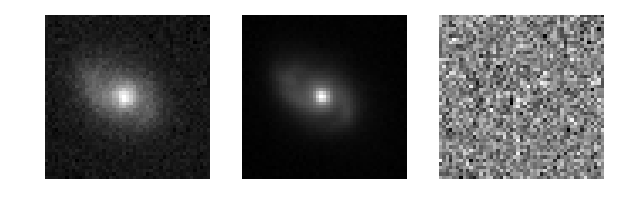

In [41]:
## load fits images
diffhdu = fits.open('/data/des41.a/data/desgw/alyssa_test2/FindGrowthCands/gw_workflow/ootl/se_856751/WS0094_856751_WS871-356_combined_z_47+fakeSN_diff_mh.fits')
searchhdu = fits.open('/pnfs/des/persistent/gw/exp/20190510/856751/D00856751_z_47_r4p7_immask.fits.fz')
temphdu = fits.open('/data/des41.a/data/desgw/alyssa_test2/FindGrowthCands/gw_workflow/ootl/se_856751/WSTemplate_856751_WS871-356_GWV1_z_47_coadd.fits')
## check to make sure you're using the right hdu, if there's more than one it should be 'SCI'
#print(hdu.info())
idxdiff, idxsrch, idxtemp = 0,1,0

datadiff = diffhdu[idxdiff].data
datasrch = searchhdu[idxsrch].data
datatemp = temphdu[idxtemp].data

## make sure ra dec are in astropy physical units
position = SkyCoord(ra,dec, unit="deg")

## you'll know you have the right hdu if this has 'CTYPE' not empty
wdiff = wcs.WCS(diffhdu[idxdiff].header)
wsrch = wcs.WCS(searchhdu[idxsrch].header)
wtemp = wcs.WCS(temphdu[idxtemp].header)

diffhdu.close()
searchhdu.close()
temphdu.close()

## make cut out centered at position, and size 49 x 49 pixels
cutoutdiff = Cutout2D(datadiff, position, (49, 49), wcs=wdiff)
cutoutsrch = Cutout2D(datasrch, position, (49, 49), wcs=wsrch)
cutouttemp = Cutout2D(datatemp, position, (49, 49), wcs=wtemp)

## show stamps side by side
fig, ax = plt.subplots(ncols=3, nrows=1, sharex=False, sharey=False, dpi=120)# figsize=(10,30))
ax[0].imshow(cutoutsrch.data, origin='lower',cmap='gray')
ax[1].imshow(cutouttemp.data, origin='lower',cmap='gray')
ax[2].imshow(cutoutdiff.data, origin='lower',cmap='gray')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')